In [3]:
import jupyterthemes as jt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
jt.jtplot.style(theme="monokai", context="notebook",grid=True,ticks=True)
print("{}".format(tf.config.list_physical_devices("GPU")))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
pd.read_csv("fulfilment_center_info.csv")

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [5]:
pd.read_csv("meal_info.csv")

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [6]:
train_csv=pd.read_csv("train.csv")
train_csv

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


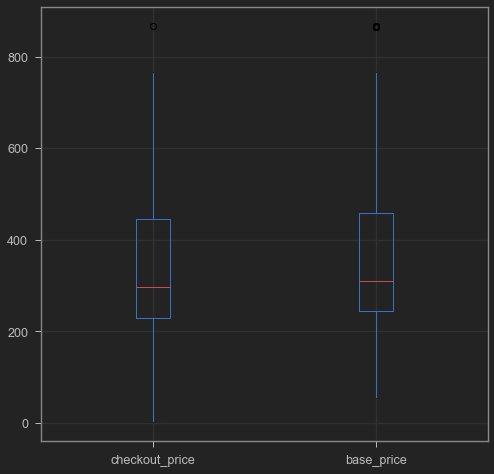

In [7]:
jt.jtplot.style(theme="monokai", context="notebook",grid=True,ticks=True)
train_csv.boxplot(column=["checkout_price","base_price"],figsize=(8,8))


In [8]:
checkout_price_outliers_index=train_csv[train_csv["checkout_price"]>800].index
train_csv.drop(checkout_price_outliers_index,inplace=True)
base_price_outliers_index=train_csv[train_csv["base_price"]>800].index
train_csv.drop(base_price_outliers_index,inplace=True)

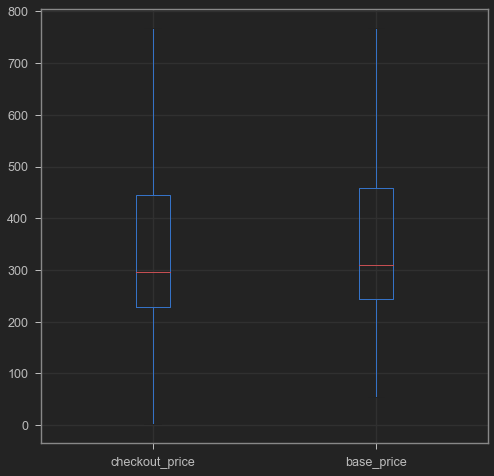

In [9]:
jt.jtplot.style(theme="monokai", context="notebook",grid=True,ticks=True)
train_csv.boxplot(column=["checkout_price","base_price"],figsize=(8,8))


In [12]:
print(train_csv['meal_id'].unique())
print(train_csv['meal_id'].nunique())

[1885 1993 2539 2139 2631 1248 1778 1062 2707 1207 1230 2322 2290 1727
 1109 2640 2306 2126 2826 1754 1971 1902 1311 1803 1558 2581 1962 1445
 2444 2867 1525 2704 2304 2577 1878 1216 1247 1770 1198 1438 2494 1847
 2760 2492 1543 2664 2569 2490 1571 2956 2104]
51


In [13]:
print(train_csv['center_id'].unique())
print(train_csv['center_id'].nunique())

[ 55  24  11  83  32  13 109  52  93 186 146  57 149  89 124 152  97  74
 108  99  66  94  91  20  34 137  92 126  36 162  75 177  27 157 106  64
 129  14  17 153 139 161  81  26  73  50 104  42 113 145  53  72  67 174
  29  77  41  30  76  59  88 143  58  10 101  80  43  65  39 102 110 132
  23  86  68  51  61]
77
